# Orientation Analysis Plot (Polar coordinates)

In [12]:
# Import required modules

import pandas as pd

import matplotlib.pyplot as plt 

import seaborn as sns

import math

import re 

import pathlib

from pathlib import Path

import scipy

from scipy.signal import savgol_filter

import numpy as np

plt.rcParams['svg.fonttype'] = 'none'

w137 d14 400 con t6_OJ_Distribution
0
15920
w137 d14 800 con t6_OJ_Distribution
569
17399
w137 d28 400 con tray 9_OJ_Distribution
885
31184
w137 d28 400 exp tray 5_OJ_Distribution
1500
15940
w137 d28 800 con tray 5_OJ_Distribution
3836
21258
w137 d28 800 exp tray 4_OJ_Distribution
5873
21266
w164 d14 400 con t5_OJ_Distribution
106
13652
w164 d14 800 con t6_OJ_Distribution
0
14881
w164 d28 400 con tray 5_OJ_Distribution
1197
23242
w164 d28 400 exp tray 5_OJ_Distribution
1566
20193
w164 d28 800 con tray 6_OJ_Distribution
5427
21596
w164 d28 800 exp tray 5_OJ_Distribution
2956
22219
w184 d14 400 con t7_OJ_Distribution
778
21870
w184 d14 800 con t7_OJ_Distribution
3426
21823
w184 d28 400 con tray 7_OJ_Distribution
1046
28144
w184 d28 400 exp tray 4_OJ_Distribution
1158
26106
w184 d28 800 con t8_OJ_Distribution
555
41802
w184 d28 800 exp tray 5_OJ_Distribution
6003
19810
w184 d7 400 con t5_OJ_Distribution
277
16455
w184 d7 800 con t5_OJ_Distribution
0
7356


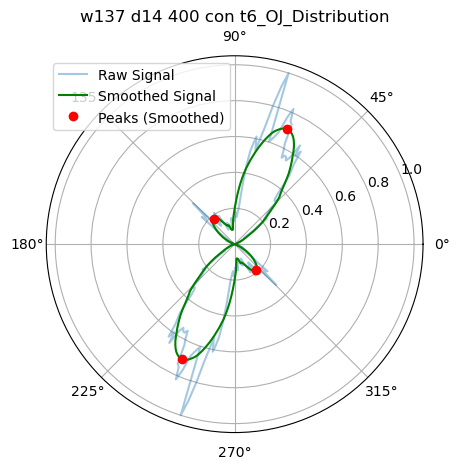

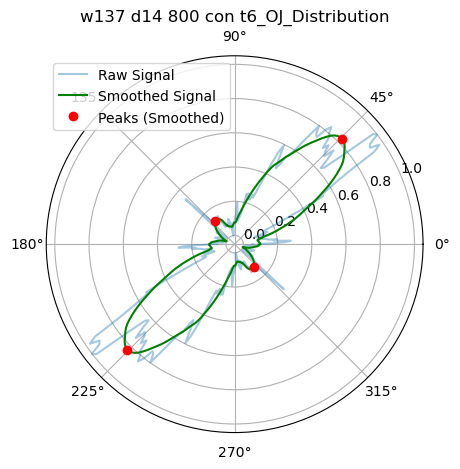

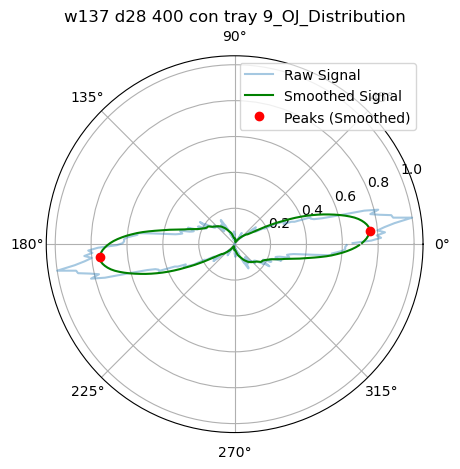

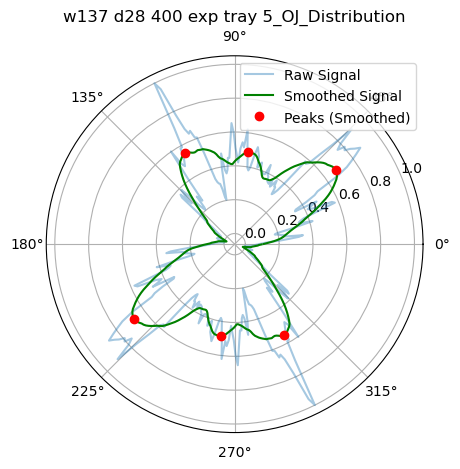

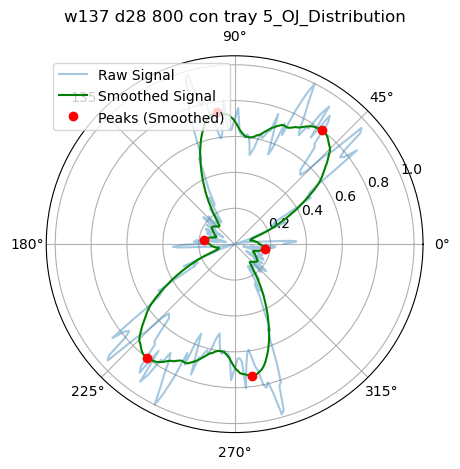

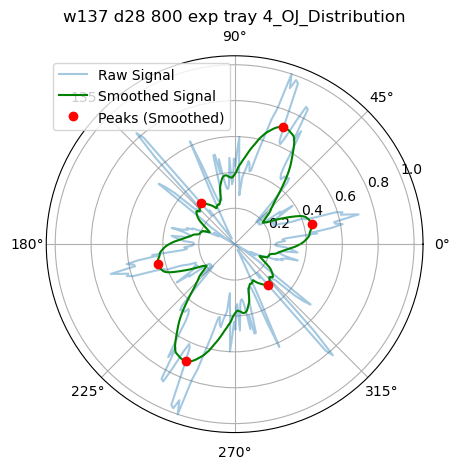

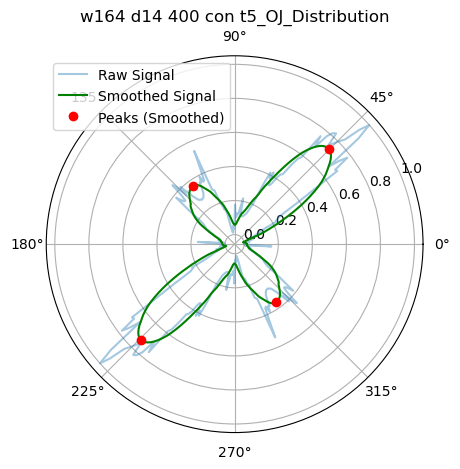

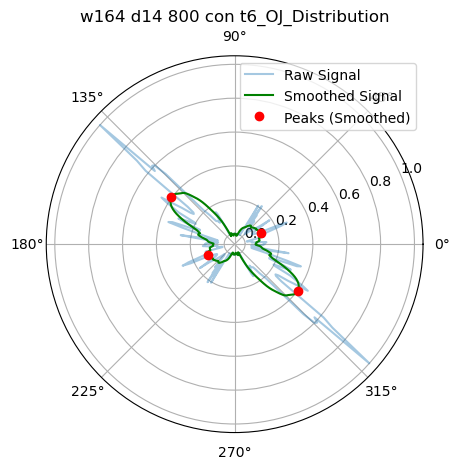

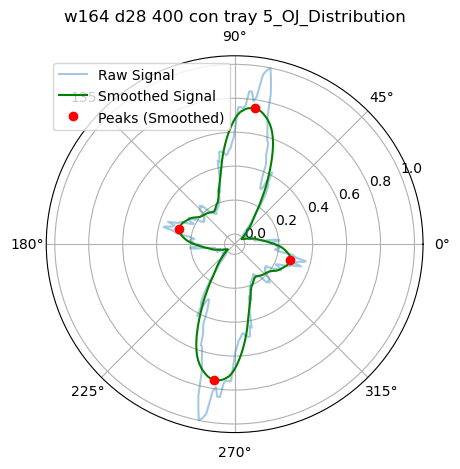

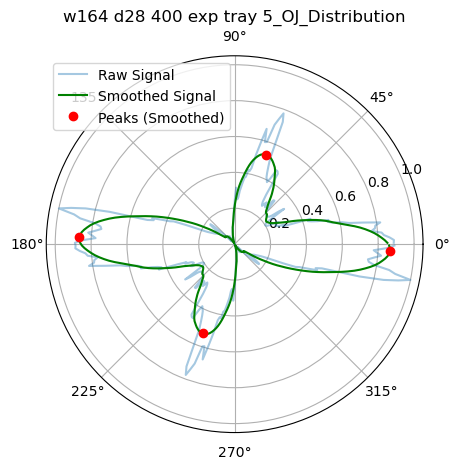

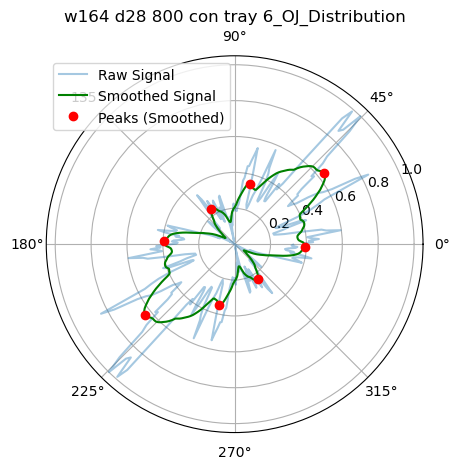

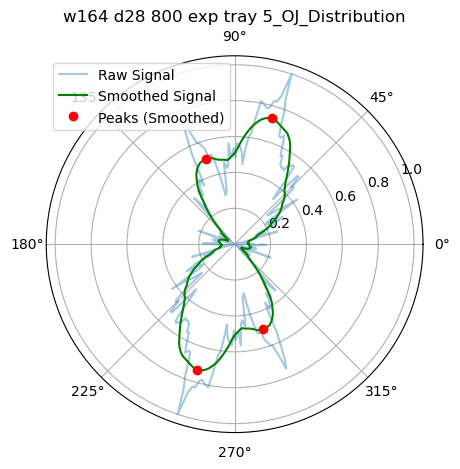

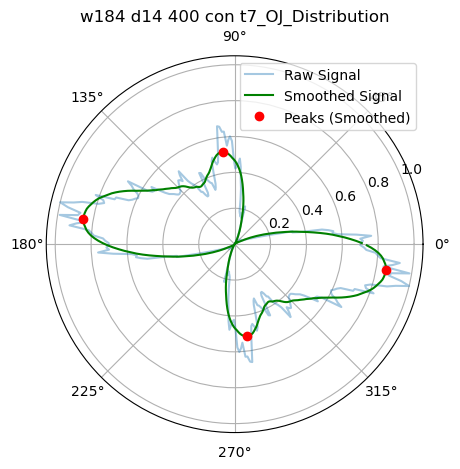

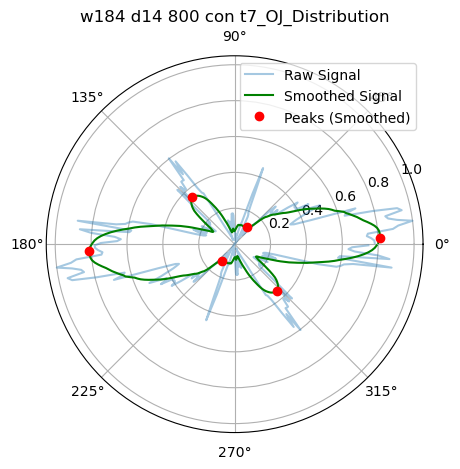

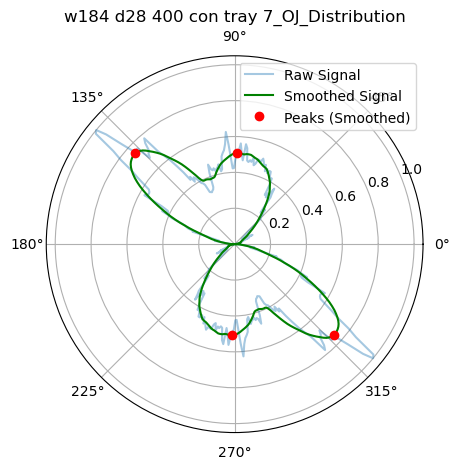

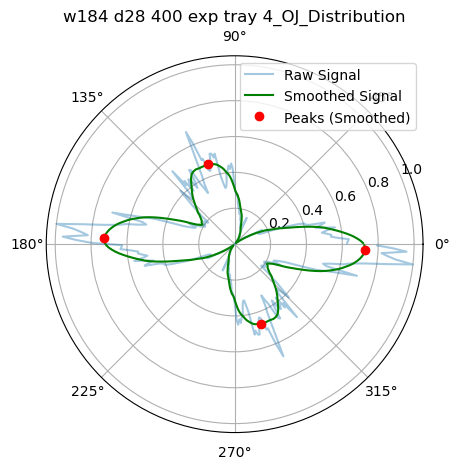

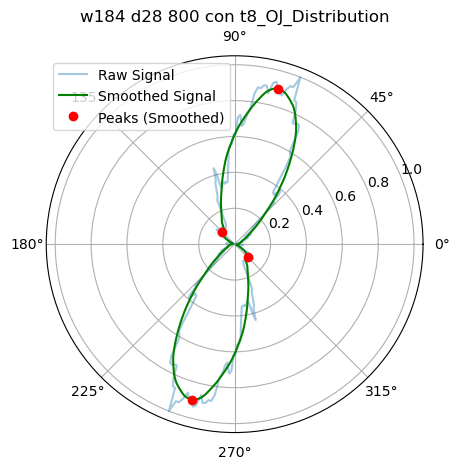

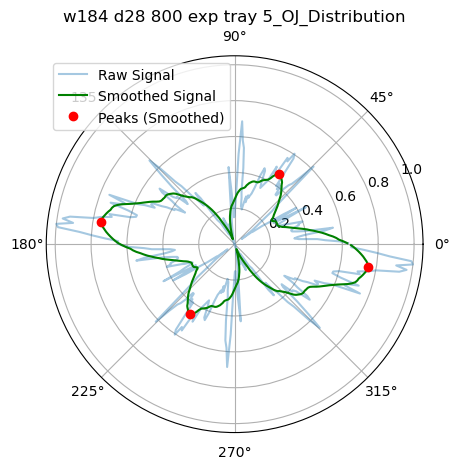

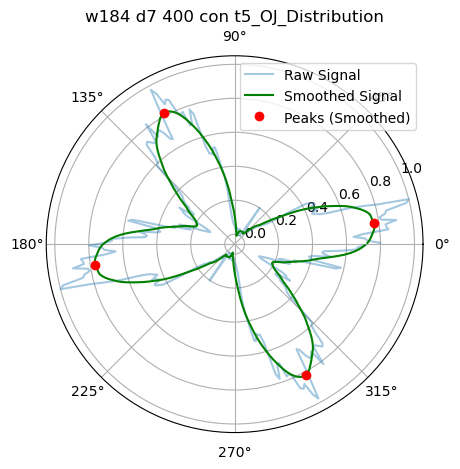

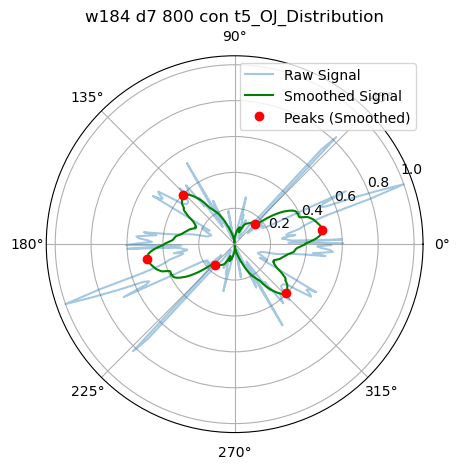

In [47]:
# Import data from filepath

folder_path = Path(r"C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\5. Mechanical Stimulation\Primary\Imaging\Pic Red\analysed")

for csv_file in folder_path.glob("*.csv"):

    title = csv_file.stem
    print(title)

    # read in csv file
    df = pd.read_csv(csv_file)

    # df is from -90 to 90, but we want from 0 to 360 to ensure all peaks within datarange
    # first add 90 to original df make it from 0 to 180
    df['Orientation'] += 90

    # Create a second copy shifted from [0, 180] → [180, 360]
    df_copy = df.assign(Orientation=df['Orientation'] + 180)     

    # append second half of circular data to first to get 360 degree data
    df_circular = pd.concat([df, df_copy], ignore_index=True)

    # now lets extend the data -180 and +180 to avoid artefacts when smoothing
    # Assume df has 'Orientation' from 0 to 360 and 'Signal'
    df_extended = pd.concat([df_circular.assign(Orientation=df_circular['Orientation'] - 360), 
                             df_circular, 
                             df_circular.assign(Orientation=df_circular['Orientation'] + 360)], 
                             ignore_index=True)

    # calculate orientation in radians
    df_extended['Orientation_rad'] = df_extended['Orientation'] * (math.pi / 180) 

    # normalise data 
    Slice1_min = df_extended['Slice1'].min()
    Slice1_max = df_extended['Slice1'].max()
    print(Slice1_min)
    print(Slice1_max)
    df_extended['Slice1_norm'] = (df_extended['Slice1'] - Slice1_min)/(Slice1_max - Slice1_min)

    # smooth signal
    df_extended['Slice1_smooth'] = savgol_filter(df_extended['Slice1_norm'], 50, 2)

    # Trim back to the original 0–360 range
    df_trimmed = df_extended[(df_extended['Orientation'] >= 0) & (df_extended['Orientation'] <= 360)].reset_index(drop=True)


    # find peaks from data
    # compare find_peaks of smoothed data, to find_peaks_cwt of raw data
    # find peaks in smoothed signal
    peaks, props = scipy.signal.find_peaks(df_trimmed['Slice1_smooth'], distance=35, height=0.1)


    # Set up plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    # Plot raw signal
    ax.plot(df_trimmed['Orientation_rad'], df_trimmed['Slice1_norm'], label='Raw Signal', alpha=0.4)

    # Plot smoothed signal
    ax.plot(df_trimmed['Orientation_rad'], df_trimmed['Slice1_smooth'], label='Smoothed Signal', color='green')

    # Plot peaks from smoothed signal
    ax.plot(df_trimmed['Orientation_rad'].iloc[peaks],
            df_trimmed['Slice1_smooth'].iloc[peaks],
            'ro', label='Peaks (Smoothed)')

    # Decorations
    ax.set_title(title)
#     ax.set_xlabel('Orientation (Degrees)')
#     ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)

    # Save the figure as SVG
    plt.tight_layout()
    plt.savefig(f'{title}.svg', format='svg')


   

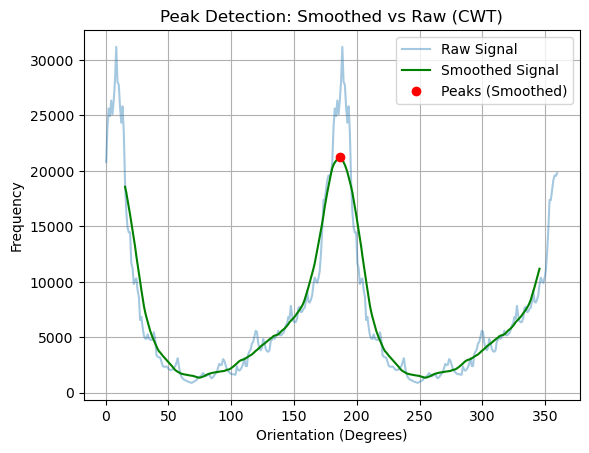

In [ ]:
file_path = Path(r"C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\5. Mechanical Stimulation\Primary\Imaging\Pic Red\analysed\w137 d28 400 con tray 9_OJ_Distribution.csv")

df = pd.read_csv(file_path)

# df is from -90 to 90, but we want from 0 to 360 to ensure all peaks within datarange
# first add 90 to original df make it from 0 to 180
df['Orientation'] = df['Orientation'] + 90

# duplicat and shift orientaion 180 to generate second half of circular data
df_copy = df.copy()

#  add 180 to orientation in copy to make it 180 to 360
df_copy['Orientation'] = df_copy['Orientation'] + 180 

# append second half of circular data to first
df_circular = pd.concat([df, df_copy], ignore_index=True)

# calculate orientation in radians
df_circular['Orientation_rad'] = df_circular['Orientation'] * (math.pi / 180)

# smooth signal
window_size = 30
df_circular['Slice1_smooth'] = df_circular['Slice1'].rolling(window=window_size, center=True).mean()

# find peaks from data
# compare find_peaks of smoothed data, to find_peaks_cwt of raw data
# find peaks in smoothed signal
peaks, props = scipy.signal.find_peaks(df_circular['Slice1_smooth'], distance=45, height=0.0)

# Set up plot
fig, ax = plt.subplots()

# Plot raw signal
ax.plot(df_circular['Orientation'], df_circular['Slice1'], label='Raw Signal', alpha=0.4)

# Plot smoothed signal
ax.plot(df_circular['Orientation'], df_circular['Slice1_smooth'], label='Smoothed Signal', color='green')

# Plot peaks from smoothed signal
ax.plot(df_circular['Orientation'].iloc[peaks],
        df_circular['Slice1_smooth'].iloc[peaks],
        'ro', label='Peaks (Smoothed)')

# Decorations
ax.set_xlabel('Orientation (Degrees)')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True)

plt.show()


# Plot all data on same graph 

C:\Users\mbgm4fs3\AppData\Local\Temp\ipykernel_18192\1303790554.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rect to make room for the colorbar


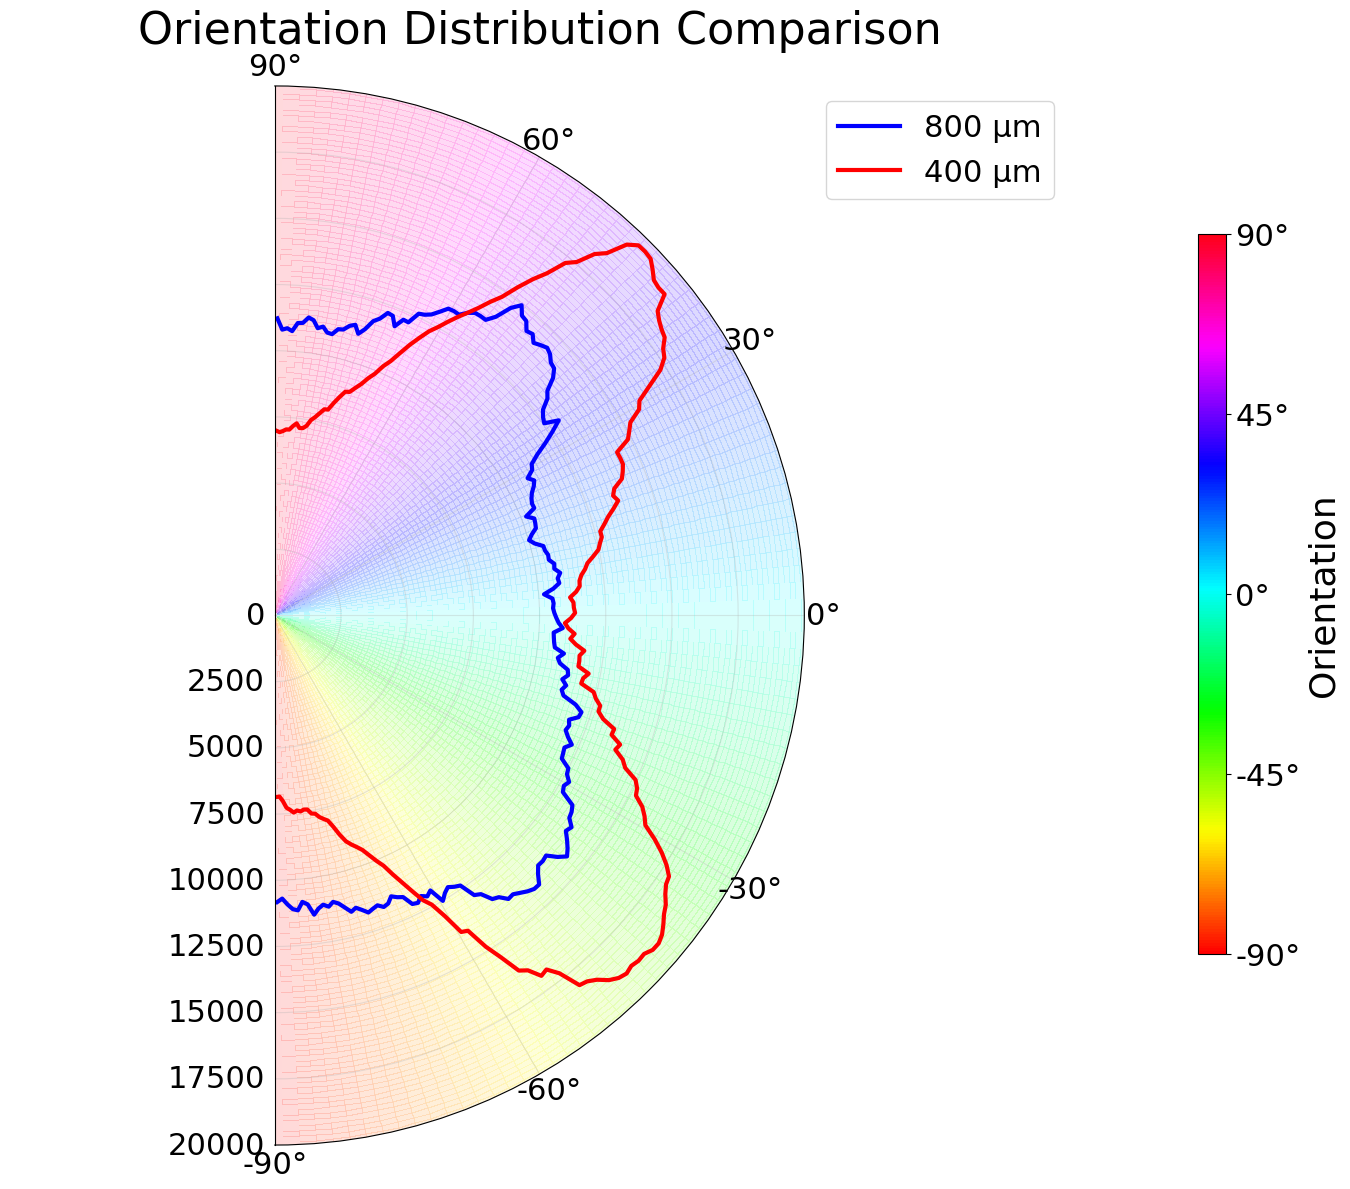

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math

# Import data from filepath
df = pd.read_csv(r'C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\3. Static Culture\Y201\OrientationJ\800d28y201_orientation_distribution.csv')
df['Direction'] = df['Direction'] * (math.pi / 180)

df_400 = pd.read_csv(r'C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\3. Static Culture\Y201\OrientationJ\400d28y201_orientation_distribution.csv')
df_400['Direction'] = df_400['Direction'] * (math.pi / 180)

# Create a function to generate the OrientationJ-style colormap background
def add_orientation_colormap(ax, rmax):
    # Create a meshgrid for the background
    r = np.linspace(0, rmax, 100)
    theta = np.linspace(-np.pi/2, np.pi/2, 100)
    R, T = np.meshgrid(r, theta)
    
    # Normalize angles from [-pi/2, pi/2] to [0, 1] for HSV
    norm_angle = (T + np.pi/2) / np.pi
    
    # Create a custom colormap based on HSV
    hsv_cmap = plt.cm.hsv
    
    # Plot the background with the HSV colormap
    im = ax.pcolormesh(T, R, norm_angle, cmap=hsv_cmap, alpha=0.15, shading='auto')
    
    return ax

# Create a single polar plot
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='polar')

# Set font sizes
title_fontsize = 32
label_fontsize = 26
tick_fontsize = 22
legend_fontsize = 22

# Set rmax value (adjust as needed based on your data)
rmax = 20000

# Add the orientation colormap background
add_orientation_colormap(ax, rmax)

# Plot both datasets on the same plot with different colors and line styles
ax.plot(df['Direction'], df['Frequency'], linewidth=3, color='blue', label='800 μm')
ax.plot(df_400['Direction'], df_400['Frequency'], linewidth=3, color='red', label='400 μm')

# Set the theta and r limits
ax.set_thetamin(-90)
ax.set_thetamax(90)
ax.set_rmin(0)
ax.set_rmax(rmax)

# Add grid, title, and other formatting
ax.grid(alpha=0.3)
ax.set_title('Orientation Distribution Comparison', fontsize=title_fontsize)
ax.tick_params(labelsize=tick_fontsize)

# Add a legend
ax.legend(fontsize=legend_fontsize, loc='upper right')

# Add a colorbar to show angle-to-color mapping
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cb = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.hsv), cax=cbar_ax)
cb.set_ticks([0, 0.25, 0.5, 0.75, 1.0])
cb.set_ticklabels(['-90°', '-45°', '0°', '45°', '90°'])
cb.ax.tick_params(labelsize=tick_fontsize)
cb.set_label('Orientation', fontsize=label_fontsize)

# Save the figure
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rect to make room for the colorbar
plt.savefig('combined_polar_plot.svg', format='svg')
plt.savefig('combined_polar_plot.png', format='png', dpi=300)

# Optional: display the plot in an interactive session
# plt.show()